In [55]:
import timeit

import numpy as np

from scipy import optimize

from matplotlib import pyplot as plt

from pandas import read_csv
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler as scaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [56]:
# constants

PATH = 'http://www2.cs.uh.edu/~dss/teaching/COSC6339/datasets/cancer_1M.csv'
BATCH_SIZE = 5000

In [57]:
results = {}

(1000302, 32)
         patient_id            x1            x2            x3            x4  \
count  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06   
mean   2.850000e+02  1.412729e+01  1.928965e+01  9.196903e+01  6.548891e+02   
std    1.642560e+02  3.520953e+00  4.297257e+00  2.427763e+01  3.516049e+02   
min    1.000000e+00  6.981000e+00  9.710000e+00  4.379000e+01  1.435000e+02   
25%    1.430000e+02  1.170000e+01  1.617000e+01  7.517000e+01  4.203000e+02   
50%    2.850000e+02  1.337000e+01  1.884000e+01  8.624000e+01  5.511000e+02   
75%    4.270000e+02  1.578000e+01  2.180000e+01  1.041000e+02  7.827000e+02   
max    5.690000e+02  2.811000e+01  3.928000e+01  1.885000e+02  2.501000e+03   

                 x5            x6            x7            x8            x9  \
count  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06   
mean   9.640773e-02  1.043761e-01  8.884359e-02  4.894025e-02  1.812285e-01   
std    1.406847e-02  5.278895e-02  7.

C:\Users\Firelord\AppData\Local\Temp\ipykernel_10132\2501673589.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X.hist(ax=ax)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

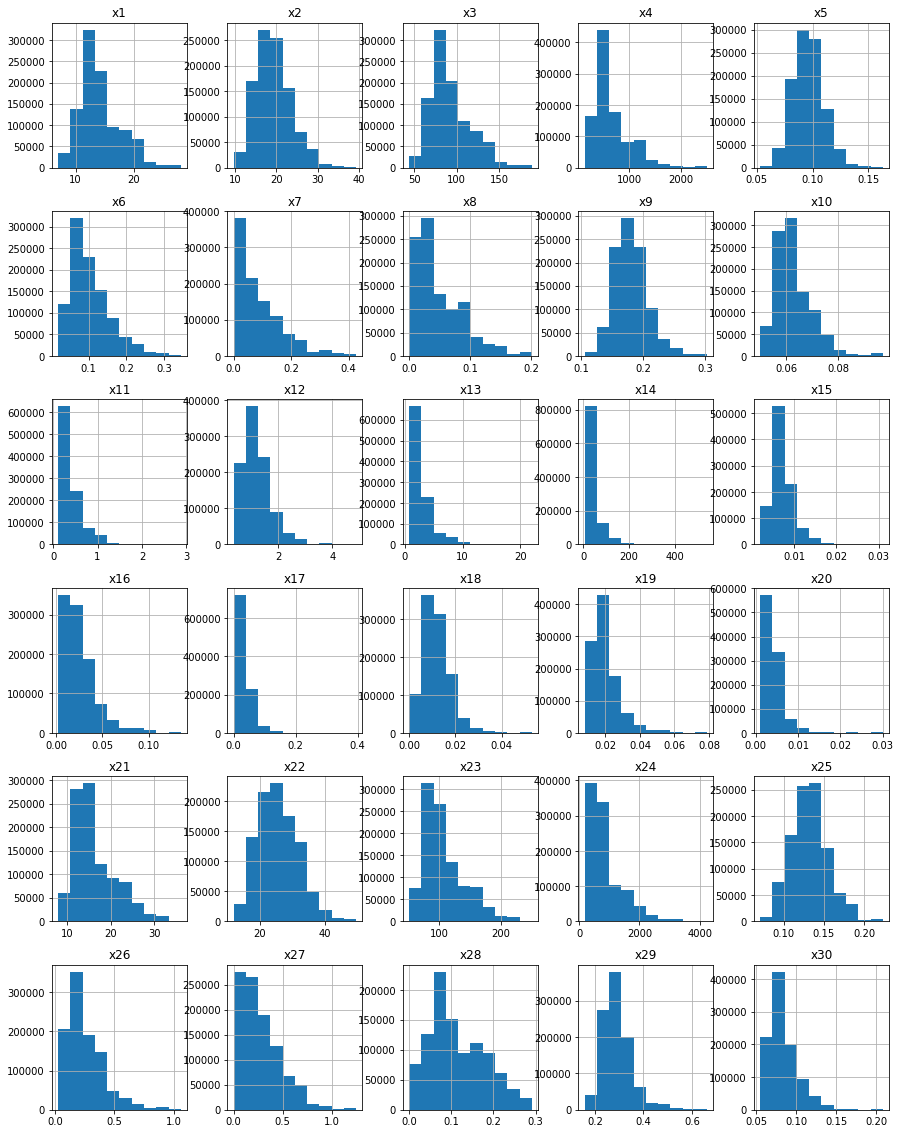

In [58]:
df = read_csv(PATH)

print(df.shape)
print(df.describe())
print(df.isnull().sum())
X, y = df.iloc[:, 1:-1], df.iloc[:, [-1]]

fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
X.hist(ax=ax)


### Preprocessing

(1000302, 30)
                 x1            x2            x3            x4            x5  \
count  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06   
mean  -1.348736e-16  8.884643e-16  2.806006e-15  4.412701e-16 -3.848743e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.029648e+00 -2.229249e+00 -1.984504e+00 -1.454443e+00 -3.085464e+00   
25%   -6.893853e-01 -7.259631e-01 -6.919555e-01 -6.671955e-01 -7.397918e-01   
50%   -2.150816e-01 -1.046362e-01 -2.359800e-01 -2.951869e-01 -2.898205e-02   
75%    4.693926e-01  5.841756e-01  4.996769e-01  3.635073e-01  6.107467e-01   
max    3.971288e+00  4.651889e+00  3.976130e+00  5.250529e+00  4.733443e+00   

                 x6            x7            x8            x9           x10  \
count  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06  1.000302e+06   
mean   1.530162e-16  1.095752e-16 -2.655305e-16 -3.119623e-15 -1.638907e-15   
std    1.000000e+00  1.000000e+00  1.

C:\Users\Firelord\AppData\Local\Temp\ipykernel_10132\1004520806.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scaled_X.hist(ax=ax)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

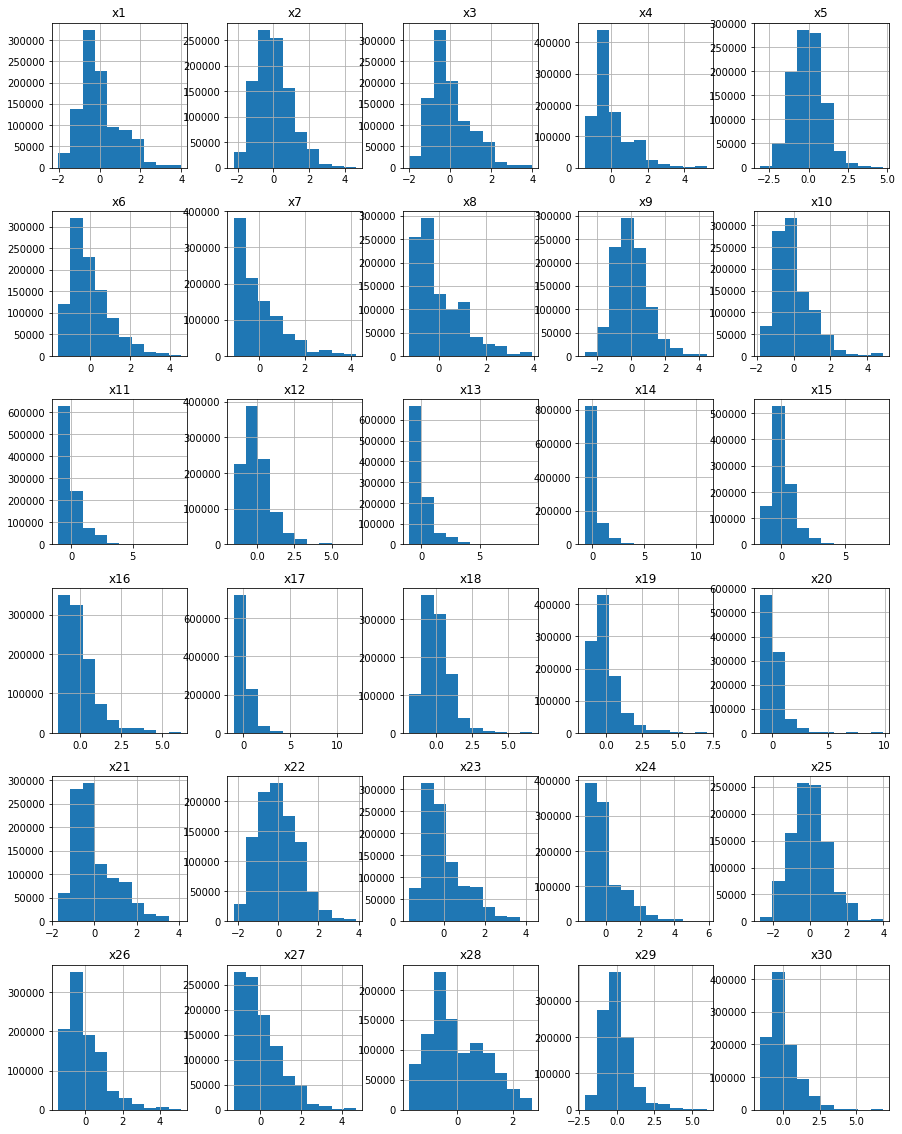

In [59]:
scaled = scaler().fit_transform(X)
scaled_X = DataFrame(scaled, columns=X.columns)

print(scaled_X.shape)
print(scaled_X.describe())

fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
scaled_X.hist(ax=ax)


### Built-in methods

In [60]:
start_time = timeit.default_timer()

pca = PCA(n_components=6)
pca_X = pca.fit_transform(scaled_X)
pca_df_X = DataFrame(pca_X)

results['builtin_pca_time'] = timeit.default_timer() - start_time

print(pca_df_X.shape)
print(pca_df_X.describe)
# prints percent of explained variance of each PC starting from PC-1 to PC-6
print(pca.explained_variance_ratio_)
pca_pc = DataFrame(pca.components_,columns=scaled_X.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
# prints weights of each PC
print(pca_pc)
# prints the max weight value for each PC (i.e. the feature that has the most impact with each PC)
loc = pca_pc.abs().idxmax(axis=1)
for i in range(0, 6):
    print(f"PC-{i+1}", loc[i], pca_pc[loc[i]][i])

(1000302, 6)
<bound method NDFrame.describe of                 0         1         2         3         4         5
0        6.161530  5.045744  0.451844  0.955195 -0.566693  2.504988
1       -2.689911  1.419035  0.968645  0.016412 -1.318857  0.900080
2       -2.624027 -1.138342 -1.310405  0.901159  0.389368  1.598105
3       -2.463402  0.564137 -1.223546  2.194209 -0.695963 -0.792553
4       -2.377876 -0.764903  2.032544  0.074531 -0.544755 -1.039791
...           ...       ...       ...       ...       ...       ...
1000297 -2.778793 -2.533419 -0.903281 -0.262443  1.659328  0.954893
1000298  3.725406  5.911725 -4.973746 -1.147632 -0.593475 -0.889862
1000299 -1.863915 -1.641895  1.234183 -0.797724  0.756838  1.641065
1000300  9.086410  2.060891  2.202227 -1.025956  0.815443  4.230711
1000301  1.804473  0.740624 -1.442198 -1.204831 -1.465823 -0.751020

[1000302 rows x 6 columns]>
[0.44242301 0.18957071 0.0940245  0.06599365 0.05521005 0.04011789]
            x1        x2        x3      

In [61]:
X_train, X_test, y_train, y_test = train_test_split(pca_df_X, y, test_size=0.20, random_state=0)

start_time = timeit.default_timer()

lr_model = LogisticRegression()
lr_model.fit(X_train.values, y_train.values)

results['builtin_lr_time'] = timeit.default_timer() - start_time

C:\Users\Firelord\PycharmProjects\COSC-6339-HW1\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.9736580342995387
[[-3.07598114  1.73072218  0.60821271  0.78666926  1.46663145  0.47559429]] [0.44982993]


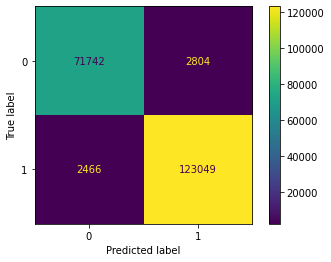

In [62]:
predictions = lr_model.predict(X_test.values)

results['builtin_lr_accuracy'] = lr_model.score(X_test.values, y_test.values)
results['builtin_lr_predictions'] = predictions

ConfusionMatrixDisplay.from_predictions(y_test.values, predictions)
print(f"Accuracy = {lr_model.score(X_test.values, y_test.values)}")
print(lr_model.coef_, lr_model.intercept_)


### Manual Implementation

In [63]:
#gamma matrix calculation

def Z(X, y=None):
    #assume that X is an n x d dataset (n rows of observations, d columns of features) and Y (output) is the last column in dataset
    Z = X.copy().T
    row_1 = np.ones(Z.shape[1])
    row_y = y.T[0] if y is not None else np.zeros(Z.shape[1])
    Z = np.insert(Z, 0, row_1, axis=0)
    Z = np.insert(Z, Z.shape[0], row_y, axis=0)
    return Z
def gamma(X, y=None):
    z = Z(X, y)
    gamma = np.dot(z, z.T)
    return gamma
def k_gamma(gamma):
    d = len(gamma) - 2
    l = L(gamma)
    q = Q(gamma)
    k_g = np.zeros((d+1, d+1))
    k_g[0, 0] = gamma[0, 0]
    k_g[1:, 0] = l
    k_g[0, 1:] = np.transpose(l)
    for i in range(d):
        k_g[i+1, i+1] = q[i, i]
    return k_g
def L(gamma):
    d = len(gamma) - 2
    return gamma[1:d+1, 0]
def Q(gamma):
    d = gamma.shape[1] - 2
    return gamma[1:d+1, 1:d+1]
#if working in chunks, intermediate gammas should be d x d in size according to paper.
def update_gamma(old_gamma, new_gamma):
    return np.add(old_gamma, new_gamma)

In [64]:
# PCA

def pca(gamma, ev_threshold=1.00):

    n = int(gamma[0][0])
    q = Q(gamma)
    l = L(gamma)

    corr_mat = np.zeros(q.shape)

    for a in range(q.shape[0]):
        for b in range(q.shape[1]):
            corr_mat[a][b] = ((n * q[a][b]) - (l[a] * l[b])) / (
                np.sqrt((n * q[a][a]) - (l[a] ** 2)) * np.sqrt((n * q[b][b]) - (l[b] ** 2)))

    # eigenvectors and eigenvalues
    U = np.zeros(n)
    S = np.zeros(n)

    U, S, V = np.linalg.svd(corr_mat)

    principal_comps = [dim for dim, ev in enumerate(S) if ev >= ev_threshold]
    
    # explained variance of each PC
    sum_eigenvalues = sum(S)
    var_exp = [(i/sum_eigenvalues) for i in sorted(S, reverse=True)]

    return U[principal_comps], var_exp


def dim_reduction(X, U):
    return np.matmul(X, U.T)

In [65]:
# Class Decomposition using K-Means

def init_centroids(X, k):
    # randomly select k data points as initial centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    return centroids


def find_closest_centroid(x, centroids):
    J = [np.dot((x - centroid).T, (x - centroid)) for centroid in centroids]

    return np.argmin(J)


def find_closest_centroids(X, centroids):
    # for each data point in X, find the index of the closest centroid
    idx = [find_closest_centroid(x, centroids) for x in X]

    return idx


def get_mean_from_gamma(cluster):
    gamma_matrix = gamma(cluster)
    k_gamma_matrix = k_gamma(gamma_matrix)

    n = k_gamma_matrix[0, 0]
    L = k_gamma_matrix[1:, 0]

    return (L / n)


def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in np.arange(K):
        cluster = X[idx == i]
        centroids[i] = get_mean_from_gamma(cluster)

    return centroids


def run_kmeans(X, K, max_iters=10):
    # initialize the centroids
    centroids = init_centroids(X, K)

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)

        centroids = compute_means(X, idx, K)

        print(f"Iteration {i+1}")

    return idx, centroids


def fit(X, y, K, max_iters=10):
    X = np.array(X)

    # separate data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    class_0 = np.take(X, class_0_indices, axis=0)
    class_1 = np.take(X, class_1_indices, axis=0)

    model = {
        'class_0': run_kmeans(class_0, K, max_iters),
        'class_1': run_kmeans(class_1, K, max_iters)
    }

    return model


def predict(X, model):
    predictions = []

    X = np.array(X)

    for x in X:
        # find closest centroids from each class
        idx_0 = find_closest_centroid(x, model['class_0'][1])
        idx_1 = find_closest_centroid(x, model['class_1'][1])

        # predict class
        closest_centroid = find_closest_centroid(
            x, np.array([model['class_0'][1][idx_0], model['class_1'][1][idx_1]]))

        predictions.append(closest_centroid)

    return predictions


In [66]:
# loading data and computing gamma

chunks = read_csv(PATH, chunksize=BATCH_SIZE)

gamma_final = np.array([])

start_time = timeit.default_timer()

for chunk in chunks:
    X, y_chunk = chunk.iloc[:, 1:-1].to_numpy(), chunk.iloc[:, [-1]].to_numpy()

    gamma_chunk = gamma(X, y_chunk)
    gamma_final = gamma_final if gamma_final.size else np.zeros(
        gamma_chunk.shape)
    gamma_final = update_gamma(gamma_final, gamma_chunk)

print(gamma_final.shape)
print(gamma_final)


(32, 32)
[[1.00030200e+06 1.41315582e+07 1.92954740e+07 ... 2.90214156e+05
  8.39849340e+04 6.27606000e+05]
 [1.41315582e+07 2.12041483e+08 2.77493226e+08 ... 4.13563879e+06
  1.18694044e+06 7.62323122e+06]
 [1.92954740e+07 2.77493226e+08 3.90674885e+08 ... 5.62601229e+06
  1.62925707e+06 1.12434121e+07]
 ...
 [2.90214156e+05 4.13563879e+06 5.62601229e+06 ... 8.80215446e+04
  2.49675221e+04 1.69643484e+05]
 [8.39849340e+04 1.18694044e+06 1.62925707e+06 ... 2.49675221e+04
  7.37796209e+03 4.98691860e+04]
 [6.27606000e+05 7.62323122e+06 1.12434121e+07 ... 1.69643484e+05
  4.98691860e+04 6.27606000e+05]]


In [67]:
# computing PCA

ev_treshold = 1.00

# function also prints explained variances for all PCs. We chose the first 6.
pca_U, var_exp = pca(gamma_final, ev_threshold=ev_treshold)

print(pca_U.shape)

(6, 30)


In [68]:
# dimensionality reduction

pca_X = dim_reduction(scaled, pca_U)
pca_df_X = DataFrame(pca_X)

results['gamma_pca_time'] = timeit.default_timer() - start_time

print(pca_df_X.shape)
print(pca_df_X.describe)
print(pca_U)
max_values = np.argmax(abs(pca_U), axis=1)
# prints where the max weight value occurs for each PC
for i in range(len(max_values)):
    print(f"PC-{i+1}", f"Max value: {pca_U[i, max_values[i]]}", f"at variable: x{max_values[i]+1}",)


(1000302, 6)
<bound method NDFrame.describe of                 0         1         2         3         4         5
0        0.088341  0.206427  1.610018  4.182663  0.712785  2.243776
1        1.619316 -1.629092  0.776419 -0.901725  0.552506  0.640568
2        0.268395  0.079829 -0.576712 -0.679154  0.654448 -0.796928
3        0.088012 -0.456026 -0.191141 -1.529389  1.668853  0.011524
4        1.101600 -1.399399  0.068606 -1.733148 -0.819385 -0.670381
...           ...       ...       ...       ...       ...       ...
1000297  0.018243  0.228417 -0.653701 -1.040868 -0.046849 -1.572428
1000298 -3.476190 -0.874798  0.893795  3.846499  2.618512  3.489481
1000299  1.915773  0.008381  0.103338 -0.425084 -0.578529 -1.103231
1000300 -0.402051  2.036196  1.057839  6.332838 -1.667580  1.553027
1000301 -0.621838  0.305911 -0.214684  0.536494  0.182547  0.518478

[1000302 rows x 6 columns]>
[[-2.19137896e-01  2.33643053e-01 -8.48492346e-03 -4.07750361e-02
  -3.74001388e-02 -1.81287805e-02  1.25887

In [69]:
# training

X_train, X_test, y_train, y_test = train_test_split(pca_df_X, y, test_size=0.20, random_state=0)

start_time = timeit.default_timer()

model = fit(X_train, y_train, K=5, max_iters=1) # @TODO: tune these parameters

results['gamma_kmeans_time'] = timeit.default_timer() - start_time


Iteration 1
Iteration 1


Accuracy = 0.9442769955163675


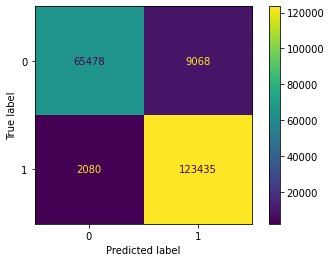

In [70]:
# evaluation

predictions = predict(X_test, model)

results['gamma_kmeans_accuracy'] = accuracy_score(y_test, predictions)
results['gamma_kmeans_predictions'] = predictions

ConfusionMatrixDisplay.from_predictions(y_test.values, predictions)
print(f"Accuracy = {accuracy_score(y_test.values, predictions)}")


### Results



## RESULTS ##


PCA: 

Time taken by built-in PCA:  3.5594246000000567
Time taken by gamma-based PCA:  5.562042100000326



Built-in Logistic Regression: 

Time taken by built-in Logistic Regression:  1.103055100000347
Accuracy of built-in Logistic Regression:  0.9736580342995387
Confusion Matrix of built-in Logistic Regression: 
[[ 71742   2804]
 [  2466 123049]]


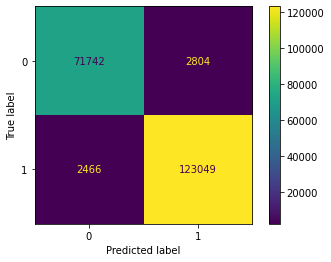



Gamma-based K-Means: 

Time taken by gamma-based K-Means:  17.763017499999478
Accuracy of gamma-based K-Means:  0.9442769955163675
Confusion Matrix of gamma-based K-Means: 
[[ 65478   9068]
 [  2080 123435]]


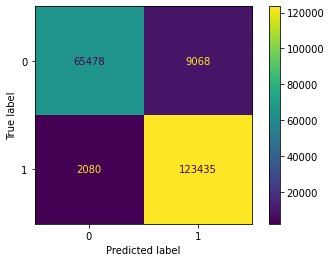

In [71]:
# printing results
print('\n\n## RESULTS ##\n\n')

# PCA
print('PCA: \n')
print('Time taken by built-in PCA: ', results['builtin_pca_time'])
print('Time taken by gamma-based PCA: ', results['gamma_pca_time'])

print('\n\n')

# Built-in LR
print('Built-in Logistic Regression: \n')
print('Time taken by built-in Logistic Regression: ', results['builtin_lr_time'])
print('Accuracy of built-in Logistic Regression: ', results['builtin_lr_accuracy'])
print('Confusion Matrix of built-in Logistic Regression: ')
print(confusion_matrix(y_test.values, results['builtin_lr_predictions']))
ConfusionMatrixDisplay.from_predictions(y_test.values, results['builtin_lr_predictions'])
plt.show()

print('\n')

# Gamma-based K-Means
print('Gamma-based K-Means: \n')
print('Time taken by gamma-based K-Means: ', results['gamma_kmeans_time'])
print('Accuracy of gamma-based K-Means: ', results['gamma_kmeans_accuracy'])
print('Confusion Matrix of gamma-based K-Means: ')
print(confusion_matrix(y_test.values, results['gamma_kmeans_predictions']))
ConfusionMatrixDisplay.from_predictions(y_test.values, results['gamma_kmeans_predictions'])
plt.show()
